In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv("salary_800.csv")
df

,Experience_Years,Education_Level,Hours_Per_Week,Age,Performance_Score,Salary
0,13,4,54,33,9.30,138.69
1,2,3,30,27,1.12,88.96
2,28,3,48,52,2.67,166.70
3,2,3,35,24,2.90,84.77
4,6,2,55,31,9.86,133.19
...,...,...,...,...,...,...
795,3,3,54,23,8.85,103.02
796,21,2,52,50,1.95,142.77
797,27,4,39,55,1.93,171.04
798,12,2,43,32,4.60,115.96


In [6]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Experience_Years,Education_Level,Hours_Per_Week,Age,Performance_Score,Salary
0,13,4,54,33,9.30,138.69
1,2,3,30,27,1.12,88.96
2,28,3,48,52,2.67,166.70
3,2,3,35,24,2.90,84.77
4,6,2,55,31,9.86,133.19
...,...,...,...,...,...,...
795,3,3,54,23,8.85,103.02
796,21,2,52,50,1.95,142.77
797,27,4,39,55,1.93,171.04
798,12,2,43,32,4.60,115.96


In [ ]:
x=df.drop("Salary",axis=1)
y=df["Salary"]
y

0      138.69
1       88.96
2      166.70
3       84.77
4      133.19
        ...  
795    103.02
796    142.77
797    171.04
798    115.96
799    152.15
Name: Salary, Length: 800, dtype: float64

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
model=RandomForestRegressor(n_estimators=50)
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [10]:
y_pred=model.predict(x_test)
y_pred

array([132.4114, 129.9743, 170.6971, 150.1433,  65.865 , 138.8499,
       149.1367, 153.0438, 160.2063,  83.1088, 149.6443, 146.4839,
       122.6835, 130.114 , 147.809 , 145.2656, 135.9625, 123.9004,
       154.4088, 157.847 , 167.2469, 140.4922, 143.8194, 176.2085,
       147.3309, 106.8852, 170.7803, 197.7533, 104.1949, 121.8656,
       122.6613,  96.3219, 115.1669, 120.412 , 147.6499, 157.2777,
       109.584 , 111.9769, 149.9844, 156.5948, 102.7275, 168.7343,
       116.8351, 172.0646, 153.392 , 114.245 , 119.0679, 173.9897,
       118.8085, 163.5396, 160.7375, 103.7055, 119.0395, 164.7746,
       135.9896, 130.1232, 163.2354, 144.8368, 106.856 ,  90.0282,
       145.9007, 111.3262, 117.6862, 106.9115, 142.416 , 102.0814,
       132.4709, 141.5391, 132.8961, 120.8272, 105.3371, 129.1499,
       113.0623, 101.6112, 111.5772, 138.8846, 107.3838, 124.1608,
        92.3681, 113.0619, 142.82  ,  97.7568, 159.9195, 138.0018,
        83.3709, 194.4717,  98.6234,  97.3786, 114.1701, 161.5

In [ ]:
msc=mean_squared_error(y_pred,y_test)
print(msc)
rmsc=np.sqrt(msc)
print(rmsc)

118.08481569562503
10.866683748762776


In [12]:
score=r2_score(y_pred,y_test)
score

0.8534465613437986

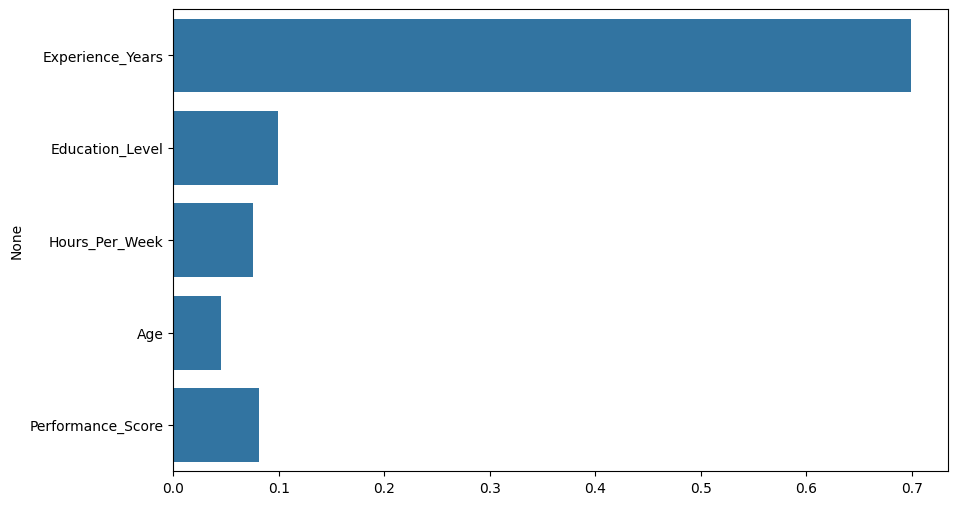

In [13]:
plt.figure(figsize=[10,6])
sns.barplot(x=model.feature_importances_,y=x.columns)
plt.show()

In [16]:
data=pd.DataFrame({
    "Experience_Years":[2],
    "Education_Level":[3],
    "Hours_Per_Week":[54],
    "Age":[33],
    "Performance_Score":[9.30]
})
predi=model.predict(data)
predi

array([109.0717])